In [39]:
# Student Performance Prediction using Machine Learning
# By:** Kartik Barade  

# This notebook demonstrates building a machine learning model to Student Performance Prediction using Naive Bayes and Logistic Regression.

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load Dataset
df = pd.read_csv('data.csv')
# Show first 5 student data
df.head()


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [42]:
df.shape

(1000, 12)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [44]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
count,960.000000,960.000000,950.000000,967.000000,957.000000,960.000000,976.000000,959.000000
mean,5416.019792,85.510417,17.630526,77.598759,1.520376,80.030208,2.406967,77.248175
std,2653.748319,7.332125,6.272132,10.006640,1.046439,9.493652,1.620267,19.298148
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000,50.000000
25%,3113.500000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,63.000000
50%,5396.500000,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000
75%,7754.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,200.000000


In [45]:
# Data Preprocessing

#Handle Missing Values
df.isnull().sum()


StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

In [50]:
# drop missing values
df.fillna(df.mean(numeric_only=True), inplace=True)


In [51]:
# Encode Categorical Variables (if any)
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [77]:
df["Pass_Fail"] = df["Attendance (%)"].apply(lambda x: 1 if x >= 75 else 0)


In [78]:
# Define Target Variable
# Assume target column is Pass_Fail
X = df.drop("Pass_Fail", axis=1)
y = df["Pass_Fail"]


In [79]:
# Feature Scaling (Important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [80]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


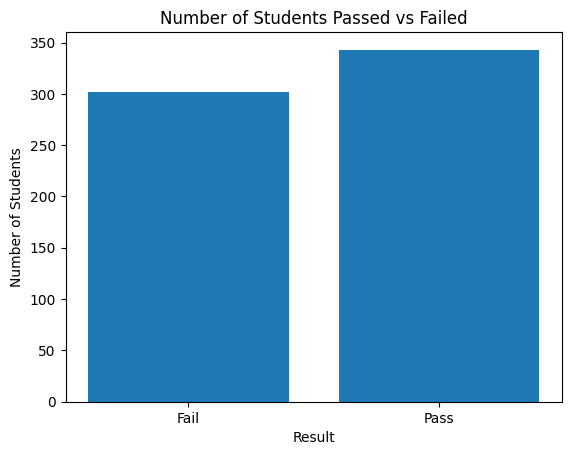

In [89]:
# Count values of Pass and Fail
pass_fail_counts = df["Pass_Fail"].value_counts()

# Plot Bar Chart
plt.figure()
plt.bar(pass_fail_counts.index, pass_fail_counts.values)

plt.xticks([1, 0], ["Pass", "Fail"])
plt.xlabel("Result")
plt.ylabel("Number of Students")
plt.title("Number of Students Passed vs Failed")

plt.show()

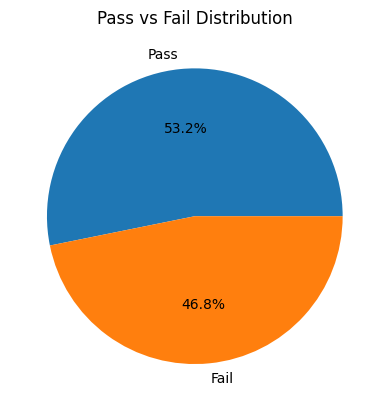

In [91]:
plt.figure()
plt.pie(pass_fail_counts.values, 
        labels=["Pass", "Fail"], 
        autopct='%1.1f%%')

plt.title("Pass vs Fail Distribution")
plt.show()


In [81]:
# Logistic Regression Model
# Train Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [82]:
# Predictions
y_pred_log = log_model.predict(X_test)


In [83]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9689922480620154

Confusion Matrix:
 [[55  0]
 [ 4 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00      0.95      0.97        74

    accuracy                           0.97       129
   macro avg       0.97      0.97      0.97       129
weighted avg       0.97      0.97      0.97       129



In [84]:
# Naïve Bayes Model
# Train Model

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [85]:
# Predictions
y_pred_nb = nb_model.predict(X_test)


In [86]:
# Evaluation
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.9844961240310077

Confusion Matrix:
 [[55  0]
 [ 2 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.97      0.99        74

    accuracy                           0.98       129
   macro avg       0.98      0.99      0.98       129
weighted avg       0.99      0.98      0.98       129



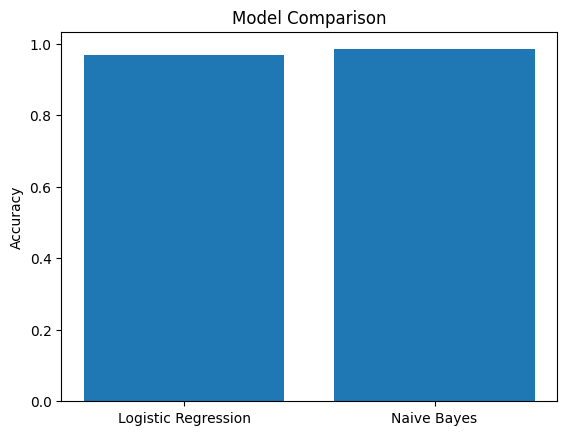

In [87]:
# Model Comparison

log_acc = accuracy_score(y_test, y_pred_log)
nb_acc = accuracy_score(y_test, y_pred_nb)

models = ['Logistic Regression', 'Naive Bayes']
accuracy = [log_acc, nb_acc]

plt.bar(models, accuracy)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()
